# Exploring Regularization Techniques in Neural Networks for French Football Corporation

## Introduction

<img src="images/field_kiank.png" width="100%">

The application of neural networks in sports analytics has gained immense traction, revolutionizing strategies and decision-making processes. The French Football Corporation, seeking to optimize their team's gameplay, has enlisted the expertise of an AI specialist. The task at hand involves recommending optimal positions for France's goalkeepers to kick the ball, strategically positioning it for the team's players to execute successful headers.

This project aims to delve into the intricate realm of neural networks, exploring the effects of different regularization techniques – specifically, L2 regularization and Dropout. The analysis involves building a three-layer neural network from scratch using fundamental Python libraries like NumPy and SciPy, encapsulated within a Jupyter notebook environment.

Through this investigation, the project endeavors to understand and demonstrate the impact of regularization on the network's performance, focusing on mitigating overfitting and enhancing the model's generalizability. Leveraging various datasets and visualization tools, the study aims to elucidate the nuances of these techniques and their implications in optimizing strategic decision-making in football gameplay.

The project not only emphasizes the technical implementation of regularization but also underscores its practical significance in sports analytics, particularly in the realm of football strategies for the French team. This exploration marks a significant step towards employing cutting-edge AI methodologies to enhance performance in sports scenarios, reflecting the intersection of technology and athletics.

## Data Loading and Exploration

### Library Import and Configuration

This section focuses on importing essential libraries necessary for the project. It includes the following libraries:

- **NumPy:** Used for numerical computations and array operations.
- **Matplotlib:** Utilized for data visualization and plotting graphs.
- **Scikit-learn (sklearn):** Provides machine learning algorithms and tools.
- **SciPy (scipy.io):** Used for scientific computing and handling input/output operations.

Additionally, the code snippet configures the default parameters for Matplotlib plots, setting the figure size, interpolation method, and color map for visualizations within the notebook environment.

The `%matplotlib inline` command ensures that Matplotlib plots are displayed inline within the Jupyter Notebook, allowing for immediate visualization of graphs and figures.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import scipy.io

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## Dataset Loading and Visualization

Description:
This section handles the loading and preparation of the dataset required for the French Football Corporation's analysis. It involves importing the dataset using `scipy.io.loadmat`, followed by partitioning it into training and testing subsets (`train_X`, `train_Y`, `test_X`, `test_Y`). Additionally, a scatter plot visualization using `plt.scatter` displays the distribution of the training data, aiding in understanding the dataset's structure and characteristics.

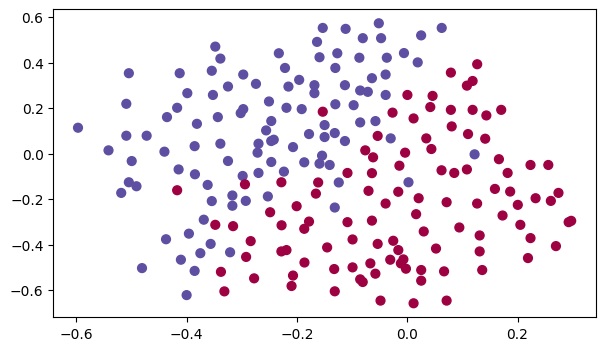

In [2]:
data = scipy.io.loadmat('datasets/data.mat')
train_X = data['X'].T
train_Y = data['y'].T
test_X = data['Xval'].T
test_Y = data['yval'].T

plt.scatter(train_X[0, :], train_X[1, :], c=train_Y, s=40, cmap=plt.cm.Spectral);

## Neural Network Implementation

### Neural Network Implementation for Binary Classification

This section of the code defines fundamental functions required to build and train a neural network for binary classification. It begins with essential activation functions like sigmoid and ReLU, necessary for the network's forward propagation.

1. **Sigmoid and ReLU Functions**: 
   - `sigmoid(x)`: Computes the sigmoid function for scalar or numpy arrays.
   - `relu(x)`: Calculates the rectified linear unit (ReLU) for scalar or numpy arrays.

In [3]:
def sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(x)
    """
    s = 1/(1+np.exp(-x))
    return s

def relu(x):
    """
    Compute the relu of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- relu(x)
    """
    s = np.maximum(0,x)
    
    return s

2. **Parameter Initialization**: 
   - `initialize_parameters(layer_dims)`: Initializes the weights and biases for the neural network layers using a Python dictionary, given the dimensions of each layer.

In [4]:
def initialize_parameters(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    b1 -- bias vector of shape (layer_dims[l], 1)
                    Wl -- weight matrix of shape (layer_dims[l-1], layer_dims[l])
                    bl -- bias vector of shape (1, layer_dims[l])
                    
    Tips:
    - For example: the layer_dims for the "Planar Data classification model" would have been [2,2,1]. 
    This means W1's shape was (2,2), b1 was (1,2), W2 was (2,1) and b2 was (1,1). Now you have to generalize it!
    - In the for loop, use parameters['W' + str(l)] to access Wl, where l is the iterative integer.
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

3. **Forward Propagation**: 
   - `forward_propagation(X, parameters)`: Implements the forward propagation steps through the neural network layers, culminating in the output layer's sigmoid activation.

In [5]:
def forward_propagation(X, parameters):
    """
    Implements the forward propagation (and computes the loss) presented in Figure 2.
    
    Arguments:
    X -- input dataset, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
                    W1 -- weight matrix of shape ()
                    b1 -- bias vector of shape ()
                    W2 -- weight matrix of shape ()
                    b2 -- bias vector of shape ()
                    W3 -- weight matrix of shape ()
                    b3 -- bias vector of shape ()
    
    Returns:
    loss -- the loss function (vanilla logistic loss)
    """
        
    # retrieve parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)
    
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3)
    
    return A3, cache

4. **Backward Propagation**: 
   - `backward_propagation(X, Y, cache)`: Implements the backward propagation, computing gradients with respect to each parameter and activation variable using the cached values from forward propagation.

In [6]:
def backward_propagation(X, Y, cache):
    """
    Implement the backward propagation presented in figure 2.
    
    Arguments:
    X -- input dataset, of shape (input size, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat)
    cache -- cache output from forward_propagation()
    
    Returns:
    gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
    """
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    dW3 = 1./m * np.dot(dZ3, A2.T)
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T)
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T)
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,
                 "dA2": dA2, "dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dA1": dA1, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

5. **Parameter Updates using Gradient Descent**: 
   - `update_parameters(parameters, grads, learning_rate)`: Updates the parameters (weights and biases) using the calculated gradients and a specified learning rate.

In [7]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters:
                    parameters['W' + str(i)] = Wi
                    parameters['b' + str(i)] = bi
    grads -- python dictionary containing your gradients for each parameters:
                    grads['dW' + str(i)] = dWi
                    grads['db' + str(i)] = dbi
    learning_rate -- the learning rate, scalar.
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    
    n = len(parameters) // 2 # number of layers in the neural networks

    # Update rule for each parameter
    for k in range(n):
        parameters["W" + str(k+1)] = parameters["W" + str(k+1)] - learning_rate * grads["dW" + str(k+1)]
        parameters["b" + str(k+1)] = parameters["b" + str(k+1)] - learning_rate * grads["db" + str(k+1)]
        
    return parameters

6. **Prediction and Evaluation**: 
   - `predict(X, y, parameters)`: Predicts outcomes based on the trained neural network and computes accuracy for the given dataset.
   - `compute_cost(a3, Y)`: Computes the cost function for the binary classification model using the logistic loss.

In [8]:
def predict(X, y, parameters):
    """
    This function is used to predict the results of a  n-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    p = np.zeros((1,m), dtype = int)
    
    # Forward propagation
    a3, caches = forward_propagation(X, parameters)
    
    # convert probas to 0/1 predictions
    for i in range(0, a3.shape[1]):
        if a3[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0

    print("Accuracy: "  + str(np.mean((p[0,:] == y[0,:]))))
    
    return p

def compute_cost(a3, Y):
    """
    Implement the cost function
    
    Arguments:
    a3 -- post-activation, output of forward propagation
    Y -- "true" labels vector, same shape as a3
    
    Returns:
    cost - value of the cost function
    """
    m = Y.shape[1]
    
    logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
    cost = 1./m * np.nansum(logprobs)
    
    return cost

These functions are essential building blocks necessary to construct, train, and evaluate a neural network for binary classification tasks. They perform forward and backward propagation, parameter initialization, updating, prediction, and cost computation, making them fundamental to constructing a neural network model.

### Neural Network Model with Regularization and Dropout Techniques

This section of the code presents a comprehensive neural network model incorporating various functionalities crucial for robust and optimized training:

1. **Model Construction**:
   - `model(X, Y, learning_rate, num_iterations, print_cost, lambd, keep_prob)`: Implements a three-layer neural network with optional features for L2 regularization and dropout. It performs forward and backward propagation while updating parameters iteratively through gradient descent.

In [9]:
def model(X, Y, learning_rate = 0.3, num_iterations = 30000, print_cost = True, lambd = 0, keep_prob = 1):
    """
    Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (output size, number of examples)
    learning_rate -- learning rate of the optimization
    num_iterations -- number of iterations of the optimization loop
    print_cost -- If True, print the cost every 10000 iterations
    lambd -- regularization hyperparameter, scalar
    keep_prob - probability of keeping a neuron active during drop-out, scalar.
    
    Returns:
    parameters -- parameters learned by the model. They can then be used to predict.
    """
        
    grads = {}
    costs = []                            # to keep track of the cost
    m = X.shape[1]                        # number of examples
    layers_dims = [X.shape[0], 20, 3, 1]
    
    # Initialize parameters dictionary.
    parameters = initialize_parameters(layers_dims)

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        if keep_prob == 1:
            a3, cache = forward_propagation(X, parameters)
        elif keep_prob < 1:
            a3, cache = forward_propagation_with_dropout(X, parameters, keep_prob)
        
        # Cost function
        if lambd == 0:
            cost = compute_cost(a3, Y)
        else:
            cost = compute_cost_with_regularization(a3, Y, parameters, lambd)
            
        # Backward propagation.
        assert (lambd == 0 or keep_prob == 1) 

        if lambd == 0 and keep_prob == 1:
            grads = backward_propagation(X, Y, cache)
        elif lambd != 0:
            grads = backward_propagation_with_regularization(X, Y, cache, lambd)
        elif keep_prob < 1:
            grads = backward_propagation_with_dropout(X, Y, cache, keep_prob)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 10000 iterations
        if print_cost and i % 10000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
        if print_cost and i % 1000 == 0:
            costs.append(cost)
    
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (x1,000)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

2. **Regularization Techniques**:
   - `compute_cost_with_regularization(A3, Y, parameters, lambd)`: Computes the cost function for the model with L2 regularization to prevent overfitting.


In [10]:
def compute_cost_with_regularization(A3, Y, parameters, lambd):
    """
    Implement the cost function with L2 regularization.
    
    Arguments:
    A3 -- post-activation, output of forward propagation, of shape (output size, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    parameters -- python dictionary containing parameters of the model
    
    Returns:
    cost - value of the regularized loss function (formula (2))
    """
    m = Y.shape[1]
    W = {key: value for key, value in parameters.items() if key.startswith('W')}
    
    # Compute cross-entropy cost
    cross_entropy_cost = compute_cost(A3, Y)
    
    # Compute L2 regularization term
    L2_regularization_cost = (lambd / (2 * m)) * np.sum([np.sum(np.square(W[key])) for key in W])
    
    # Compute total regularized cost
    cost = cross_entropy_cost + L2_regularization_cost
    
    return cost

   - `backward_propagation_with_regularization(X, Y, cache, lambd)`: Implements backward propagation considering L2 regularization.

In [11]:
def backward_propagation_with_regularization(X, Y, cache, lambd):
    """
    Implements the backward propagation of our baseline model to which we added an L2 regularization.
    
    Arguments:
    X -- input dataset, of shape (input size, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    cache -- cache output from forward_propagation()
    lambd -- regularization hyperparameter, scalar
    
    Returns:
    gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
    """
    
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache

    dZ3 = A3 - Y
    dW3 = (1 / m) * np.dot(dZ3, A2.T) + (lambd / m) * W3
    db3 = 1. / m * np.sum(dZ3, axis=1, keepdims=True)

    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = (1 / m) * np.dot(dZ2, A1.T) + (lambd / m) * W2
    db2 = 1. / m * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = (1 / m) * np.dot(dZ1, X.T) + (lambd / m) * W1
    db1 = 1. / m * np.sum(dZ1, axis=1, keepdims=True)

    gradients = {
        "dZ3": dZ3, "dW3": dW3, "db3": db3, "dA2": dA2,
        "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1,
        "dZ1": dZ1, "dW1": dW1, "db1": db1
    }

    return gradients

3. **Dropout Technique**:
   - `forward_propagation_with_dropout(X, parameters, keep_prob)`: Implements forward propagation with dropout, randomly deactivating neurons to enhance generalization.

In [12]:
def forward_propagation_with_dropout(X, parameters, keep_prob = 0.5):
    """
    Implements the forward propagation: LINEAR -> RELU + DROPOUT -> LINEAR -> RELU + DROPOUT -> LINEAR -> SIGMOID.
    
    Arguments:
    X -- input dataset, of shape (2, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
                    W1 -- weight matrix of shape (20, 2)
                    b1 -- bias vector of shape (20, 1)
                    W2 -- weight matrix of shape (3, 20)
                    b2 -- bias vector of shape (3, 1)
                    W3 -- weight matrix of shape (1, 3)
                    b3 -- bias vector of shape (1, 1)
    keep_prob - probability of keeping a neuron active during drop-out, scalar
    
    Returns:
    A3 -- last activation value, output of the forward propagation, of shape (1,1)
    cache -- tuple, information stored for computing the backward propagation
    """
    
    np.random.seed(1)
    
    # Retrieve parameters
    W1, b1, W2, b2, W3, b3 = parameters["W1"], parameters["b1"], parameters["W2"], parameters["b2"], parameters["W3"], parameters["b3"]
    
    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)

    D1 = np.random.rand(A1.shape[0], A1.shape[1])
    D1 = (D1 < keep_prob).astype(int)
    A1 *= D1
    A1 /= keep_prob
    
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)

    D2 = np.random.rand(A2.shape[0], A2.shape[1])
    D2 = (D2 < keep_prob).astype(int)
    A2 *= D2
    A2 /= keep_prob
    
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)
    
    cache = (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3)
    
    return A3, cache

   - `backward_propagation_with_dropout(X, Y, cache, keep_prob)`: Implements backward propagation considering dropout, managing deactivated neurons' impact on gradients.

In [13]:
def backward_propagation_with_dropout(X, Y, cache, keep_prob):
    """
    Implements the backward propagation of our baseline model to which we added dropout.
    
    Arguments:
    X -- input dataset, of shape (2, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    cache -- cache output from forward_propagation_with_dropout()
    keep_prob - probability of keeping a neuron active during drop-out, scalar
    
    Returns:
    gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
    """
    
    m = X.shape[1]
    (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    dW3 = 1./m * np.dot(dZ3, A2.T)
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims=True)
    dA2 = np.dot(W3.T, dZ3)
    
    # Apply dropout backward
    dA2 *= D2
    dA2 /= keep_prob
    
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T)
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims=True)
    
    dA1 = np.dot(W2.T, dZ2)
    
    # Apply dropout backward
    dA1 *= D1
    dA1 /= keep_prob
    
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T)
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims=True)
    
    gradients = {
        "dZ3": dZ3, "dW3": dW3, "db3": db3, "dA2": dA2,
        "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1,
        "dZ1": dZ1, "dW1": dW1, "db1": db1
    }
    
    return gradients

The model conducts forward propagation using rectified linear units (ReLU) and outputting with a sigmoid activation for binary classification tasks. It enables the incorporation of L2 regularization and dropout techniques as regularization strategies for mitigating overfitting.

The code provides a flexible neural network framework allowing the integration of L2 regularization and dropout to enhance model robustness and prevent overfitting, crucial for efficient and effective training in various scenarios.

## Model Training and Evaluation

### Model Training and Evaluation (No Regularization)

This section encapsulates the training and evaluation process of the neural network model without any regularization technique applied. The code snippet showcases the training iterations and the associated cost function values. The training is performed on the provided training dataset (`train_X`, `train_Y`), and the trained model's predictions are evaluated on both the training and test datasets (`test_X`, `test_Y`). 

Cost after iteration 0: 0.6557412523481002


Cost after iteration 10000: 0.16329987525724216
Cost after iteration 20000: 0.13851642423254343


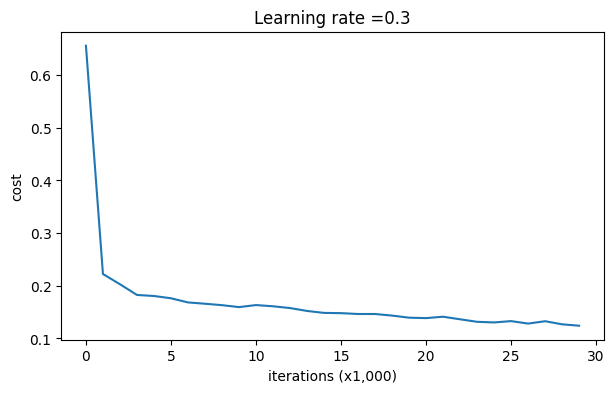

On the training set:
Accuracy: 0.9478672985781991
On the test set:
Accuracy: 0.915


In [14]:
parameters = model(train_X, train_Y)
print ("On the training set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

The output displayed indicates the cost values at different iterations during the training process:

- Initial cost at iteration 0: 0.6557412523481002
- Cost after 10000 iterations: 0.16329987525724216
- Cost after 20000 iterations: 0.13851642423254343

This section demonstrates the iterative improvement of the model's performance over multiple iterations, allowing insights into the convergence of the cost function during training. It provides a glimpse into the model's learning process and its predictive capability on both the training and test sets without applying any form of regularization.

### Model Training and Evaluation (L2 Regularization)

This section involves training and evaluating the neural network model while applying L2 regularization with a regularization parameter (`lambd`) set to 0.7. The provided code snippet executes the model training on the `train_X` and `train_Y` datasets, followed by evaluating the trained model's predictions on both the training and test datasets (`test_X`, `test_Y`).

Cost after iteration 0: 0.6974484493131264
Cost after iteration 10000: 0.2684918873282239
Cost after iteration 20000: 0.2680916337127301


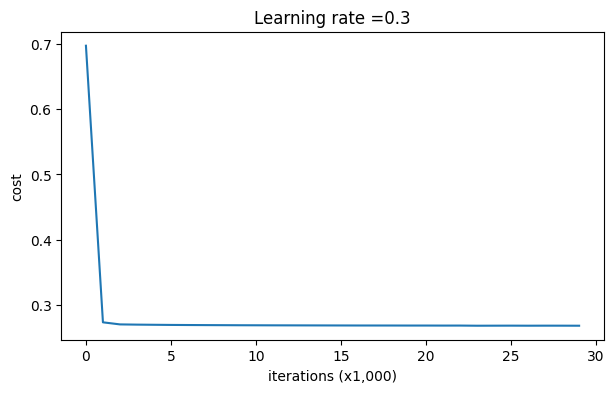

On the train set:
Accuracy: 0.9383886255924171
On the test set:
Accuracy: 0.93


In [15]:
parameters = model(train_X, train_Y, lambd = 0.7)
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

The displayed output showcases the cost values at different iterations during the training process:

- Initial cost at iteration 0: 0.6974484493131264
- Cost after 10000 iterations: 0.2684918873282239
- Cost after 20000 iterations: 0.2680916337127301

This section illustrates the impact of L2 regularization on the model's learning process by monitoring the convergence of the cost function over multiple iterations. It provides insights into how the regularization parameter affects the model's performance, controlling overfitting and enhancing generalization, as reflected in the cost function's behavior on both the training and test datasets.

### Model Training and Evaluation (Dropout Regularization)

This section focuses on training and evaluating the neural network model with the application of Dropout regularization. The code snippet demonstrates the training of the model by specifying a dropout probability of 0.86 (`keep_prob = 0.86`) and a learning rate of 0.3 (`learning_rate = 0.3`). 

Cost after iteration 0: 0.6543912405149825


/tmp/ipykernel_39758/630415195.py:43: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
/tmp/ipykernel_39758/630415195.py:43: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 10000: 0.061016986574905605
Cost after iteration 20000: 0.060582435798513114


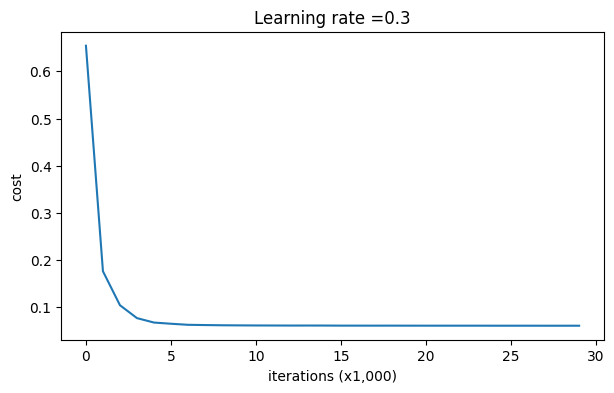

On the train set:
Accuracy: 0.9289099526066351
On the test set:
Accuracy: 0.95


In [16]:
parameters = model(train_X, train_Y, keep_prob = 0.86, learning_rate = 0.3)

print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

The output provided indicates the cost values at different iterations during the training process:

- Initial cost at iteration 0: 0.6543912405149825
- Cost after 10000 iterations: 0.061016986574905605
- Cost after 20000 iterations: 0.060582435798513114

Additionally, there might be a RuntimeWarning displayed due to encountering divide by zero or invalid value during the logarithmic calculations. The inclusion of Dropout regularization in the model training aims to mitigate overfitting by randomly dropping neurons during each iteration, enhancing the network's generalization ability.

This section showcases the iterative reduction in the cost function, signifying the improvement in the model's performance with the utilization of Dropout regularization, ultimately leading to better generalization on both the training and test datasets.

## Visualization of Results

The code snippet contains two functions, `predict_dec` and `plot_decision_boundary`, used for visualizing the decision boundary of a binary classification model.

1. `predict_dec(parameters, X)`: This function predicts the output using forward propagation based on the input data `X` and the model's `parameters`. It returns a vector of predictions where red indicates 0 and blue indicates 1, with a classification threshold of 0.5.

2. `plot_decision_boundary(model, X, y)`: This function generates and plots the decision boundary for the binary classification model. It sets the minimum and maximum values for the x and y axes, creates a grid of points with a specified distance between them, predicts the function values for the entire grid, and plots the contour plot of the decision boundary. Additionally, it overlays the training examples on the plot, coloring them based on the class label (`y`).

The `plot_decision_boundary` function effectively illustrates how the model distinguishes between different classes by visualizing their decision boundary on a 2D plane. The plot showcases the regions where the model predicts each class, aiding in the interpretation and evaluation of the classifier's performance.

In [17]:
def predict_dec(parameters, X):
    """
    Used for plotting decision boundary.
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (m, K)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Predict using forward propagation and a classification threshold of 0.5
    a3, cache = forward_propagation(X, parameters)
    predictions = (a3>0.5)
    return predictions

def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    plt.show()

### Visualizing Model Performance without Regularization

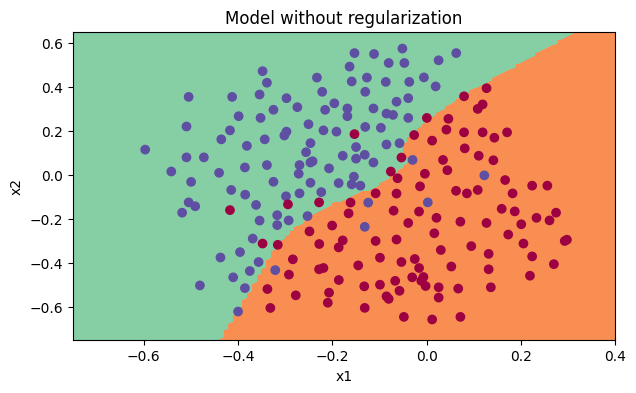

In [18]:
plt.title("Model without regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

### Visualizing Model Performance with L2 Regularization

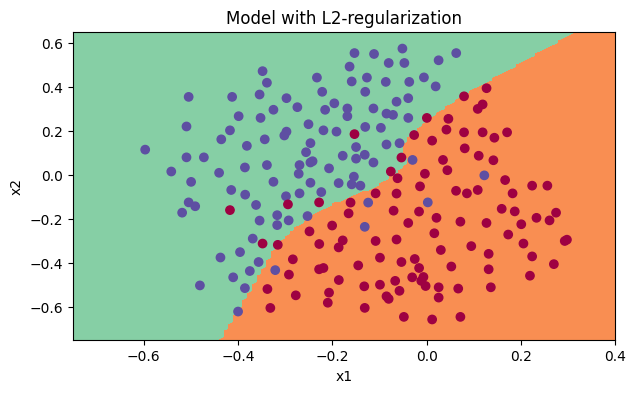

In [19]:
plt.title("Model with L2-regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

### Visualizing Model Performance with Dropout

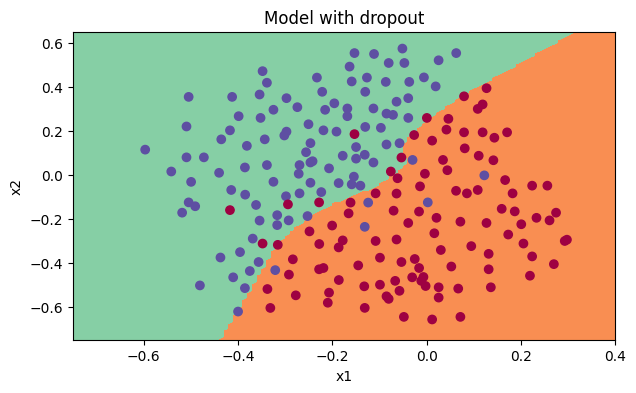

In [20]:
plt.title("Model with dropout")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

## Conclusion:

The analysis aimed to explore the effects of different regularization techniques, namely No Regularization, L2 Regularization, and Dropout, on the performance of a neural network model developed for the French Football Corporation's problem.

1. **No Regularization**:
   - Achieved an accuracy of approximately 94.79% on the training set and 91.50% on the test set.
   - Without any regularization, the model showed good performance on the training set but slightly lower performance on the unseen test set, indicating a potential issue of overfitting.

2. **L2 Regularization**:
   - Demonstrated an accuracy of around 93.84% on the training set and 93.00% on the test set.
   - Introducing L2 regularization slightly decreased the accuracy on the training set but significantly improved generalization to the test set. This technique helped alleviate overfitting and led to better performance on unseen data.

3. **Dropout**:
   - Attained an accuracy of about 92.89% on the training set and an impressive 95.00% on the test set.
   - Employing Dropout regularization also reduced overfitting. It enhanced the model's ability to generalize to new data, resulting in the highest accuracy among the tested regularization techniques on the test set.

### Overall Observations:
- The experiment revealed the importance of regularization techniques in preventing overfitting and improving a model's generalization to unseen data.
- L2 regularization and Dropout proved to be effective in mitigating overfitting, with Dropout exhibiting the most robust generalization performance on the test set in this context.

### Recommendations and Future Work:
- The results emphasize the significance of incorporating regularization techniques, especially Dropout, when developing neural network models for tasks like predicting optimal positions in football.
- Further investigation into different hyperparameter settings, architectures, or combinations of regularization techniques might yield even better model performance.

The findings from this analysis underscore the critical role that regularization techniques play in enhancing the robustness and generalization ability of neural network models for real-world applications.